In [149]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [150]:
START = "2019-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [151]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1896.000000,1910.000000,1885.000000,1902.800049,1687.075073,1094883
1,2019-01-02,1905.000000,1934.449951,1900.000000,1923.300049,1705.251099,2100463
2,2019-01-03,1919.000000,1944.949951,1893.099976,1899.949951,1684.548096,2611668
3,2019-01-04,1900.000000,1901.199951,1841.000000,1876.849976,1664.067627,4280862
4,2019-01-07,1891.800049,1908.800049,1881.000000,1897.900024,1682.730469,1856423


In [152]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1896.000000,1910.000000,1885.000000,1902.800049,1094883
1,1905.000000,1934.449951,1900.000000,1923.300049,2100463
2,1919.000000,1944.949951,1893.099976,1899.949951,2611668
3,1900.000000,1901.199951,1841.000000,1876.849976,4280862
4,1891.800049,1908.800049,1881.000000,1897.900024,1856423


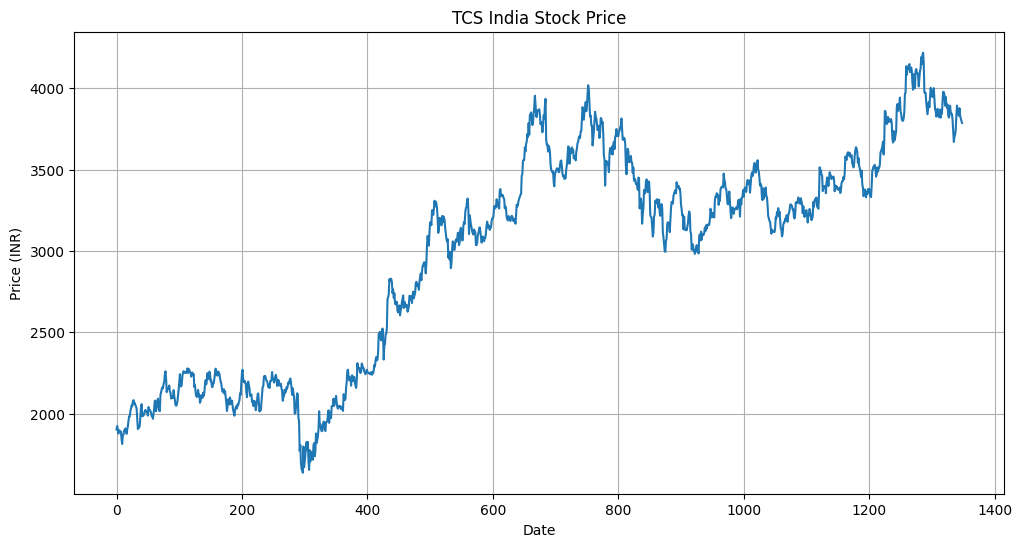

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [154]:
df

,Open,High,Low,Close,Volume
0,1896.000000,1910.000000,1885.000000,1902.800049,1094883
1,1905.000000,1934.449951,1900.000000,1923.300049,2100463
2,1919.000000,1944.949951,1893.099976,1899.949951,2611668
3,1900.000000,1901.199951,1841.000000,1876.849976,4280862
4,1891.800049,1908.800049,1881.000000,1897.900024,1856423
...,...,...,...,...,...
1344,3856.800049,3890.000000,3852.000000,3878.149902,1932323
1345,3889.000000,3889.000000,3828.000000,3832.050049,1860730
1346,3826.050049,3842.000000,3795.050049,3815.100098,1774045
1347,3827.649902,3833.850098,3792.949951,3801.699951,1509050


In [155]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1344    3942.971006
1345    3942.253506
1346    3941.791506
1347    3940.962505
1348    3939.809004
Name: Close, Length: 1349, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

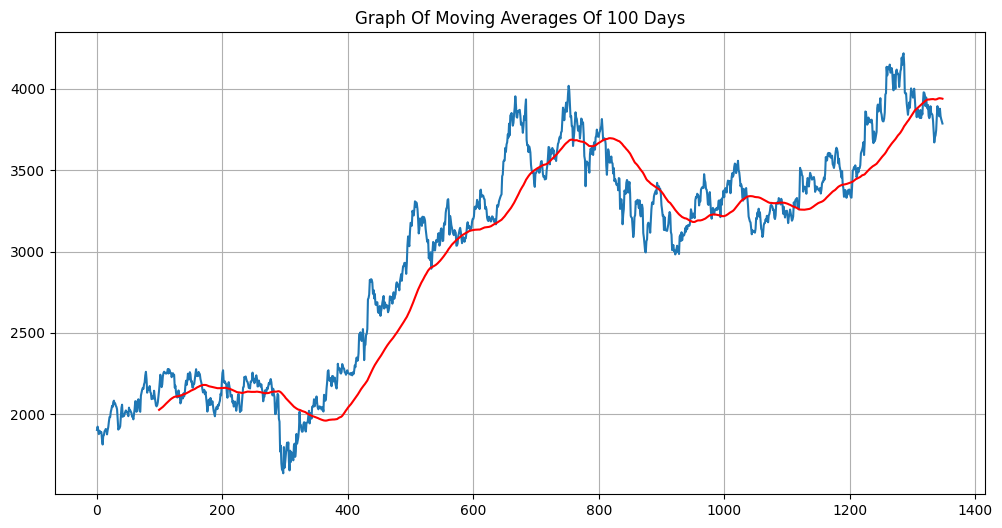

In [156]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [157]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1344    3743.575752
1345    3745.900502
1346    3747.967753
1347    3750.065503
1348    3752.010503
Name: Close, Length: 1349, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

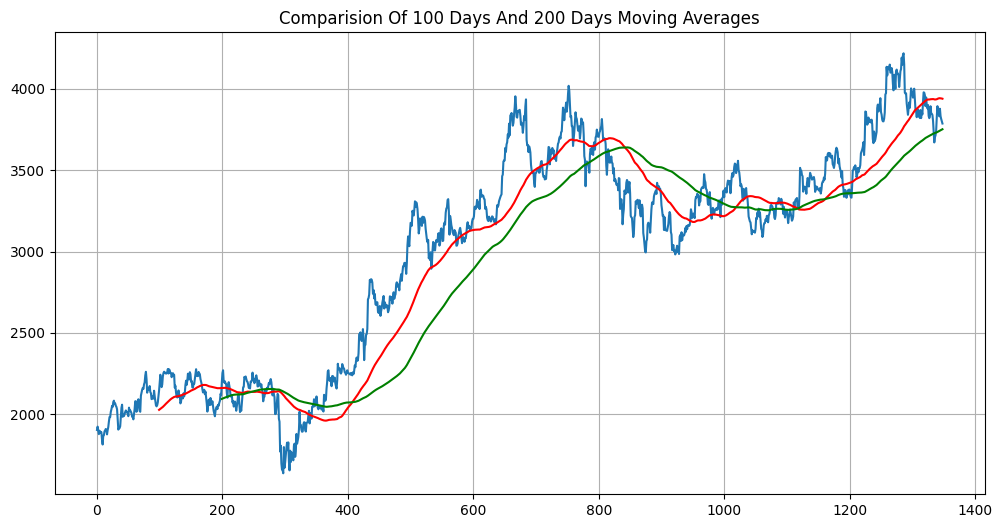

In [158]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [159]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(944, 7)
(405, 7)


In [160]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,1896.000000,1910.000000,1885.000000,1902.800049,1687.075073,1094883
1,2019-01-02,1905.000000,1934.449951,1900.000000,1923.300049,1705.251099,2100463
2,2019-01-03,1919.000000,1944.949951,1893.099976,1899.949951,1684.548096,2611668
3,2019-01-04,1900.000000,1901.199951,1841.000000,1876.849976,1664.067627,4280862
4,2019-01-07,1891.800049,1908.800049,1881.000000,1897.900024,1682.730469,1856423


In [161]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
944,2022-10-27,3160.699951,3174.000000,3134.350098,3157.399902,3019.946045,2438421
945,2022-10-28,3150.000000,3178.500000,3145.000000,3163.250000,3025.541260,1355739
946,2022-10-31,3199.000000,3199.000000,3177.800049,3193.149902,3054.139648,1919414
947,2022-11-01,3214.500000,3262.600098,3203.449951,3259.699951,3117.792725,2991060
948,2022-11-02,3270.000000,3270.000000,3222.050049,3241.699951,3100.576172,1405955


In [162]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [164]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [165]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.11182226],
       [0.12042558],
       [0.11062615],
       [0.10093168],
       [0.10976585],
       [0.10794027],
       [0.10517038],
       [0.1058419 ],
       [0.08653688],
       [0.0742404 ],
       [0.09713366],
       [0.09811988],
       [0.10825503],
       [0.11091995],
       [0.1142983 ],
       [0.11144454],
       [0.10040709],
       [0.11129767],
       [0.1193764 ],
       [0.13372924],
       [0.1453752 ],
       [0.14480865],
       [0.15853198],
       [0.16518381],
       [0.17370322],
       [0.1713111 ],
       [0.18400625],
       [0.18740555],
       [0.17838255],
       [0.18027108],
       [0.17426982],
       [0.17133205],
       [0.16507889],
       [0.14015028],
       [0.11266161],
       [0.11683735],
       [0.11660651],
       [0.12141181],
       [0.14638243],
       [0.16885596],
       [0.17699771],
       [0.14566896],
       [0.15068409],
       [0.14762045],
       [0.15244671],
       [0.15819628],
       [0.16214117],
       [0.158

In [166]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [167]:
x_train.shape

(844, 100, 1)

In [168]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [169]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [170]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step - loss: 0.1788 - mean_absolute_error: 0.3378
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - loss: 0.0234 - mean_absolute_error: 0.1232
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0183 - mean_absolute_error: 0.1000
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0127 - mean_absolute_error: 0.0832
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0147 - mean_absolute_error: 0.0906
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0100 - mean_absolute_error: 0.0747
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0111 - mean_absolute_error: 0.0771
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0095 - mean_absolute_error: 0.0727
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0097 - mean_absolute_error: 0.0755
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0094 - mean_absolute_error: 0.0703
Epoch 11/100
27/27

In [172]:
model.save('keras_model.h5')

In [173]:
test_close.shape

(405, 1)

In [174]:
past_100_days = pd.DataFrame(train_close[-100:])

In [175]:
test_df = pd.DataFrame(test_close)

In [176]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [177]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [178]:
final_df.head()

,0
0,3423.000000
1,3440.149902
2,3430.949951
3,3362.699951
4,3404.149902


In [179]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.35640961],
       [0.37027148],
       [0.36283537],
       [0.30767048],
       [0.34117351],
       [0.35972362],
       [0.30540727],
       [0.19200619],
       [0.18469125],
       [0.18125607],
       [0.12928383],
       [0.08636426],
       [0.10535876],
       [0.18582275],
       [0.1947138 ],
       [0.26410444],
       [0.25141453],
       [0.26887319],
       [0.27166171],
       [0.24931294],
       [0.23039934],
       [0.26919662],
       [0.20449403],
       [0.18933884],
       [0.2252667 ],
       [0.24717108],
       [0.22906556],
       [0.10649047],
       [0.08296953],
       [0.04582925],
       [0.01349818],
       [0.01014391],
       [0.0658341 ],
       [0.07452308],
       [0.14771258],
       [0.15781604],
       [0.15272386],
       [0.14928868],
       [0.10818773],
       [0.16715168],
       [0.22506463],
       [0.25852721],
       [0.25602167],
       [0.25036373],
       [0.2889185 ],
       [0.30140633],
       [0.30957001],
       [0.317

In [180]:
input_data.shape

(505, 1)

In [181]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [182]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(405, 100, 1)
(405,)


In [183]:
y_pred = model.predict(x_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


In [184]:
y_pred.shape

(405, 1)

In [185]:
y_test

array([0.14173122, 0.14645971, 0.17062711, 0.22441797, 0.20986899,
       0.18161975, 0.19022782, 0.20340277, 0.18913677, 0.18073057,
       0.26988354, 0.28568539, 0.28334147, 0.30172976, 0.29659713,
       0.29211115, 0.243655  , 0.26907526, 0.2637003 , 0.32177487,
       0.3294535 , 0.33397993, 0.33567739, 0.33038314, 0.3989653 ,
       0.3694632 , 0.35875353, 0.32597807, 0.32213875, 0.29785   ,
       0.25113156, 0.24603937, 0.28293733, 0.30981253, 0.26111386,
       0.20869703, 0.17782089, 0.21168761, 0.2315713 , 0.22441797,
       0.19907861, 0.21892165, 0.22425635, 0.22231657, 0.23173292,
       0.22199314, 0.22583246, 0.26616559, 0.26883274, 0.26596352,
       0.18549952, 0.27311665, 0.24599892, 0.28018907, 0.28475595,
       0.31724864, 0.28451343, 0.32036039, 0.32973648, 0.31607668,
       0.30799391, 0.34986249, 0.36715973, 0.36186548, 0.34675074,
       0.36501768, 0.30443737, 0.34456843, 0.38663908, 0.40434046,
       0.3862754 , 0.39645976, 0.43489336, 0.45166511, 0.44899

In [186]:
y_pred

array([[0.1571347 ],
       [0.16179335],
       [0.16638103],
       [0.17087455],
       [0.17543091],
       [0.18021804],
       [0.18524739],
       [0.19045158],
       [0.19575983],
       [0.20106219],
       [0.20621109],
       [0.21136221],
       [0.21676454],
       [0.22253683],
       [0.22842056],
       [0.23424187],
       [0.2399185 ],
       [0.24535285],
       [0.2504213 ],
       [0.25496984],
       [0.25903094],
       [0.26261777],
       [0.26590788],
       [0.26901847],
       [0.2719918 ],
       [0.27494943],
       [0.27789745],
       [0.28128573],
       [0.2861067 ],
       [0.29306763],
       [0.30204874],
       [0.31191176],
       [0.32008147],
       [0.32468134],
       [0.32598287],
       [0.3237178 ],
       [0.31665105],
       [0.30462253],
       [0.28989497],
       [0.27391323],
       [0.2579792 ],
       [0.24290274],
       [0.22997193],
       [0.22045073],
       [0.21503472],
       [0.21402518],
       [0.21646258],
       [0.220

In [187]:
scaler.scale_

array([0.00080828])

In [188]:
scale_factor = 1/0.00042963
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

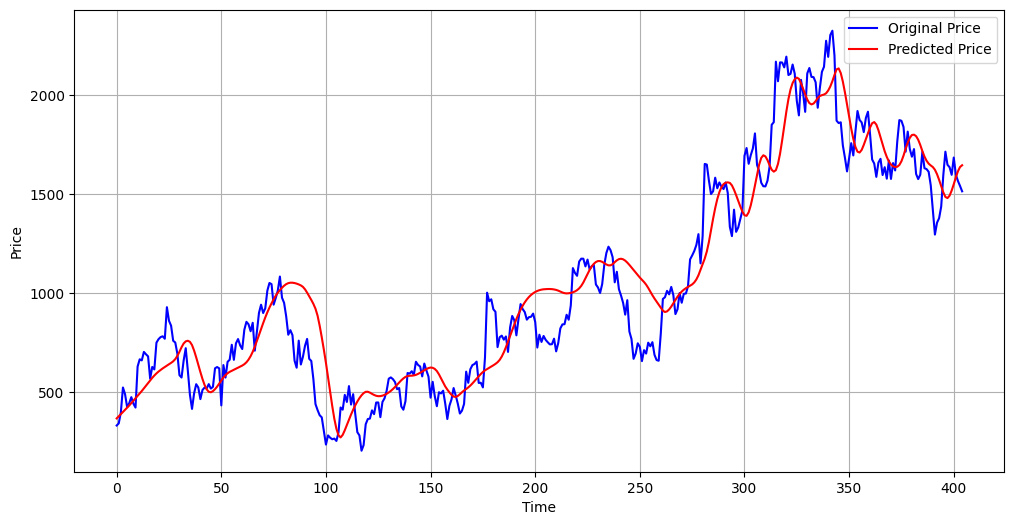

In [189]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 13.75%


In [194]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.88749683301099


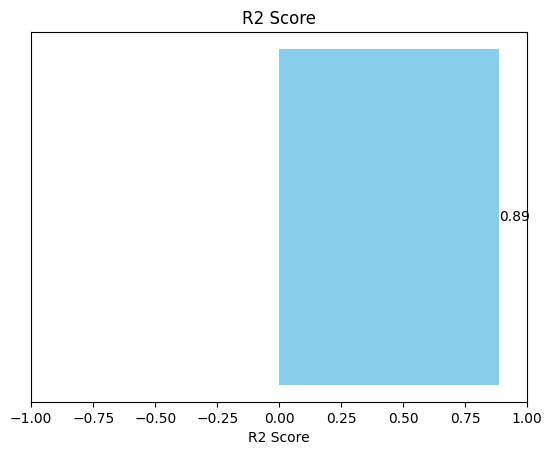

In [195]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

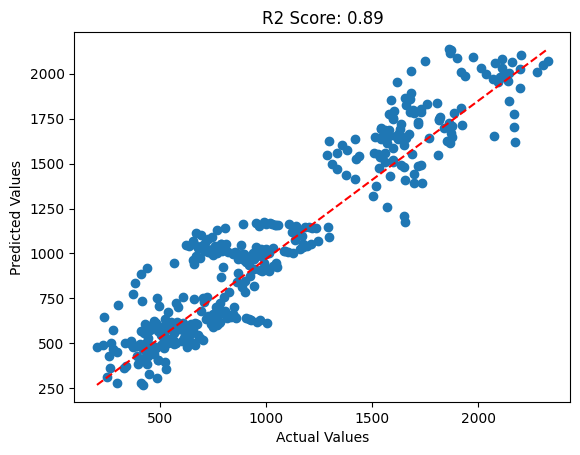

In [196]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()